In [1]:
!pip install opencv-python

## 顏色偵測

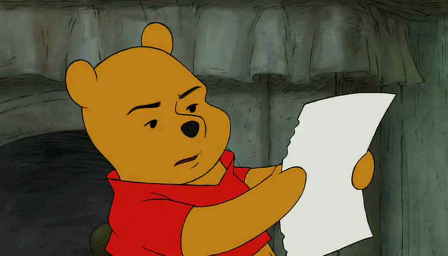

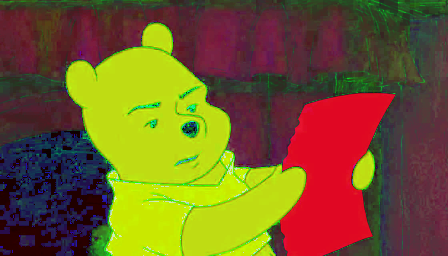

In [2]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img = cv2.imread('XiWinnie.jpg')
img = cv2.resize(img, (0,0), fx=0.4, fy=0.4)

#先將BGR圖片，轉換成HSV圖片(Hue色調,Saturation飽和度,Value亮度)
#相較於RGB，HSV更容易過濾掉顏色
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

cv2_imshow(img)
cv2_imshow(hsv)

- 控制條 Trackbar、過濾顏色 inRange、套用遮罩 bitwise_and

In [ ]:
def empty(v):
  pass

cv2.namedWindow('TrackBar')
cv2.resizeWindow('TrackBar', 640, 320)

cv2.createTrackBar('Hue Min', 'TrackBar', 0, 179, empty)
cv2.createTrackBar('Hue Max', 'TrackBar', 179, 179, empty)
cv2.createTrackBar('Saturation Min', 'TrackBar', 0, 255, empty)
cv2.createTrackBar('Saturation Max', 'TrackBar', 255, 255, empty)
cv2.createTrackBar('Value Min', 'TrackBar', 0, 255, empty)
cv2.createTrackBar('Value Max', 'TrackBar', 255, 255, empty)

while True:
  h_min = cv2.getTrackbarPos('Hue Min', 'TrackBar')
  h_max = cv2.getTrackbarPos('Hue Max', 'TrackBar')
  s_min = cv2.getTrackbarPos('Sat Min', 'TrackBar')
  s_max = cv2.getTrackbarPos('Sat Max', 'TrackBar')
  v_min = cv2.getTrackbarPos('Val Min', 'TrackBar')
  v_max = cv2.getTrackbarPos('Val Max', 'TrackBar')
  print(h_min, h_max, s_min, s_max, v_min, v_max)

  #過濾顏色 (黑色為過濾掉的地方，白色為保留的地方)
  lower = np.array([h_min, s_min, v_min])
  upper = np.array([h_max, s_max, v_max])

  mask = cv2.inRange(hsv, lower, upper)  #lower,upper需用array表示

  #套用過濾效果在原圖上(遮罩) bitwise_and
  result = cv2.bitwise_and(mg, img, mask=mask)

  cv2_imshow(mask)
  cv2_imshow(result)

cv2.waitKey(1)

## 輪廓檢測
- 邊緣 vs 輪廓 : 邊緣是把每一個邊找出來，輪廓則是把各個形狀的外框找出來。

4
8
3
4
3
6
4
8
5


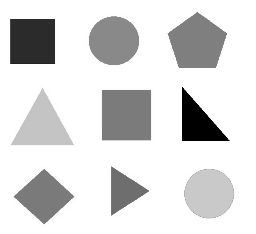

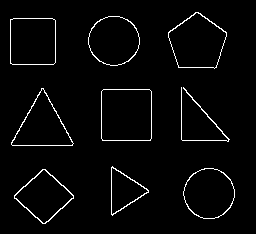

In [28]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img = cv2.imread('shape.jpg')
img = cv2.resize(img, (0,0), fx=0.4, fy=0.4)
imgContour = img.copy()

#將圖片從BGR轉換成GRAY，因為在檢測輪廓上不需要用到顏色
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#先檢測邊緣、再利用檢測到的邊緣去檢測輪廓
canny = cv2.Canny(img, 150, 200)

#偵測輪廓
contours, hierarchy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  #(圖片,偵測模式(內/外/內外輪廓),使用的近似方法(壓縮水平/垂直輪廓點/保留每個輪廓))

for cnt in contours:
  #將輪廓畫出來 (畫在甚麼上,要畫的輪廓,畫第幾個輪廓,顏色,線條粗度)
  cv2.drawContours(imgContour, cnt, -1, (255, 0, 0), 4)
  #輪廓面積
  # print(cv2.contourArea(cnt))
  #輪廓邊長
  # print(cv2.arcLength(cnt, True))  #(輪廓,輪廓是否閉合)
  #近似多邊形(回傳頂點)
  peri = cv2.arcLength(cnt, True)  #輪廓邊長
  vertices = cv2.approxPolyDP(cnt, peri*0.02, True)  #(輪廓,近似值(值越大多邊形的邊越多),輪廓是否閉合)
  print(len(vertices))

cv2_imshow(img)
cv2_imshow(canny)

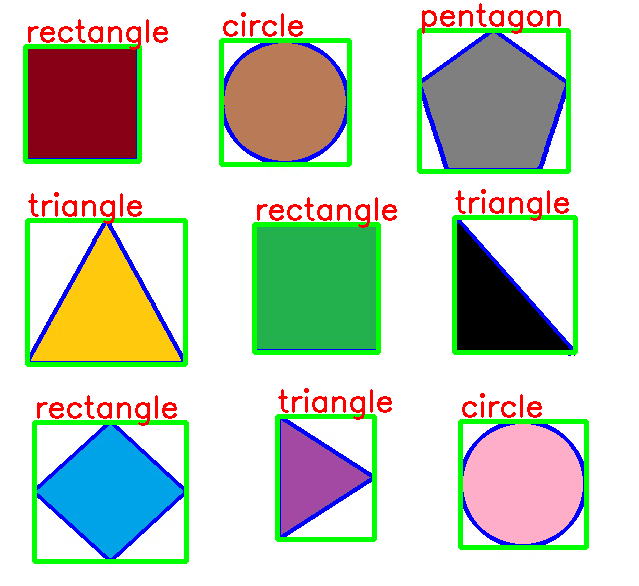

In [26]:
for cnt in contours:
    cv2.drawContours(imgContour, cnt, -1, (255, 0, 0), 4)
    area = cv2.contourArea(cnt)
    #過濾噪點
    if area > 500:
        # print(cv2.arcLength(cnt, True))
        peri = cv2.arcLength(cnt, True)
        vertices = cv2.approxPolyDP(cnt, peri * 0.02, True)
        corners = len(vertices)
        #判斷形狀前，先把每個圖形用方型框起來
        x, y, w, h = cv2.boundingRect(vertices)
        cv2.rectangle(imgContour, (x, y), (x+w, y+h), (0, 255, 0), 4)
        if corners == 3:
            cv2.putText(imgContour, 'triangle', (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        elif corners == 4:
            cv2.putText(imgContour, 'rectangle', (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        elif corners == 5:
            cv2.putText(imgContour, 'pentagon', (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        elif corners >= 6:
            cv2.putText(imgContour, 'circle', (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

cv2_imshow(imgContour)